In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('processed_clean_data.csv')
df

,name,rating,title,reviews,title_reveiws,clean_text,Length_of_title_review,Length_of_clean_text
0,C K,3.0,Publicity tactic.,Nothing new. Only to make customers fool.,Publicity tactic. Nothing new. Only to make cu...,publicity tactic nothing new make customer fool,59,47
1,Josie Lyngdoh,4.0,Its exactly shown,Really happy with it,Its exactly shown Really happy with it,exactly shown really happy,38,26
2,sandeep rawat,5.0,Nice,Nice,Nice Nice,nice,9,4
3,Ashutosh Kumar,4.0,Good.,It is good for my gum,Good. It is good for my gum,good gum,27,8
4,P.VEERA NARENDRA,5.0,Superb,Good taste,Superb Good taste,superb good taste,17,17
5,Anita Kochhar,4.0,Gentle on gums,Have sensitive gums and found other toothpast...,Gentle on gums Have sensitive gums and found ...,gentle gum sensitive gum found toothpaste irri...,95,58
6,G.l.babu,5.0,Good,Very good,Good Very good,good,14,4
7,Deokant singh,4.0,Good,Like,Good Like,good like,9,9
8,Savita sharma,4.0,Normal toothpaste,Just taste like termaric nothing special and d...,Normal toothpaste Just taste like termaric not...,normal toothpaste taste like termaric nothing ...,152,128
9,SivaRam,3.0,OK,Not so effective...,OK Not so effective...,not effective,22,13


## EDA on RAW Text

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
stopword_list=stopwords.words("english")
import matplotlib.pyplot as plt
import numpy as np

In [4]:
corpus=[]
new= df['title_reveiws'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stopword_list:
        dic[word]+=1
print(dic)

defaultdict(<class 'int'>, {'to': 9, 'with': 5, 'it': 13, 'is': 20, 'for': 20, 'my': 5, 'on': 2, 'and': 17, 'other': 2, 'was': 1, 'very': 8, 'a': 7, 'all': 2, 'so': 1, 'those': 1, 'who': 1, 'has': 4, 'have': 4, 'from': 4, 'am': 2, 'in': 5, 'me': 3, 'this': 6, 'not': 6, 'because': 1, "it's": 3, 'but': 2, 'that': 2, "doesn't": 1, 'the': 13, 'of': 9, 'we': 1, 'any': 2, 'being': 1, 'as': 2, 'which': 3, 'been': 2, 'more': 1, 'than': 3, 'no': 3, 'over': 2, 'or': 2, 'by': 2, 'do': 1, 'at': 1, 'some': 1, 'be': 2, 'these': 1, 'just': 1, 'only': 1, 'having': 1, 'such': 1, 'y': 1, 'its': 1, 'will': 2, 'once': 1, 'out': 1, 'after': 1, 'if': 1, 'you': 3})


Text(0.5, 1.0, ' TOP 20 Stop words ')

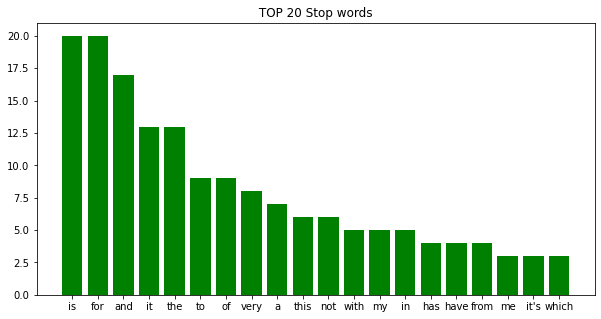

In [5]:
plt.figure(figsize=(10,5)) 
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 
x,y=zip(*top)
plt.bar(x,y,color='g')
plt.title(' TOP 20 Stop words ')

In [6]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,5))     
    sns.barplot(x=y,y=x)

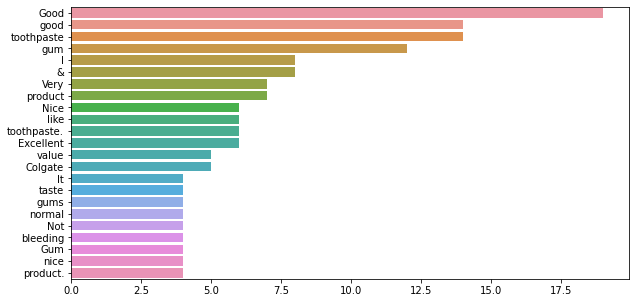

In [7]:
plot_top_non_stopwords_barchart(df['title_reveiws'])

In [8]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

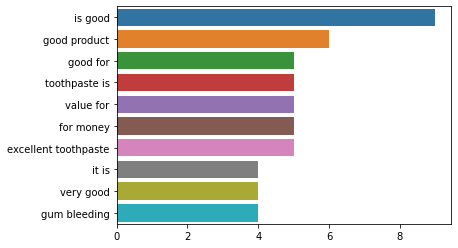

In [9]:
plot_top_ngrams_barchart(df['title_reveiws'],2)

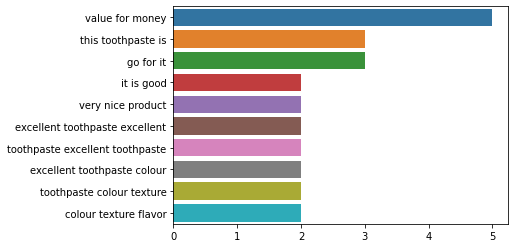

In [10]:
plot_top_ngrams_barchart(df['title_reveiws'],3)

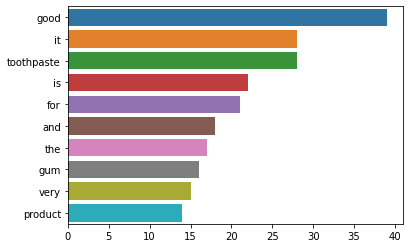

In [11]:
plot_top_ngrams_barchart(df['title_reveiws'],1)

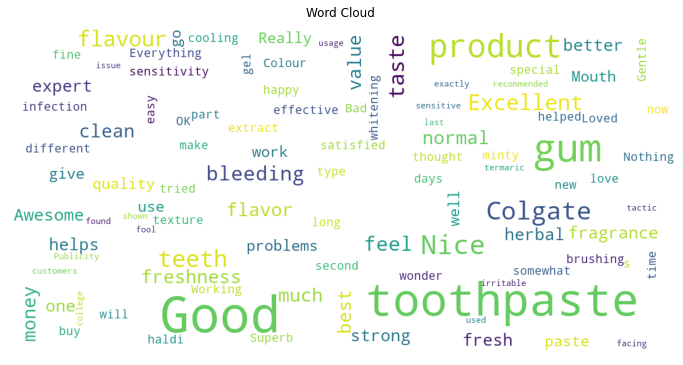

In [12]:
# Without removing Stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
    
    def list_to_string(list_input):
        return ' '.join(str(elem) for elem in list_input)
    
    wordcloud=wordcloud.generate(str(list_to_string(data)))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.title('Word Cloud ')
    plt.imshow(wordcloud)
    plt.show()
    wordcloud.to_file("wordcloud_raw.png")
    
show_wordcloud(corpus)

## EDA ON processed_text

In [13]:
df.columns

Index(['name', 'rating', 'title', 'reviews', 'title_reveiws', 'clean_text',
       'Length_of_title_review', 'Length_of_clean_text'],
      dtype='object')

In [14]:
corpus=[]
new= df['clean_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stopword_list:
        dic[word]+=1
print(dic)

defaultdict(<class 'int'>, {'not': 11})


In [15]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,30))     
    sns.barplot(x=y,y=x)

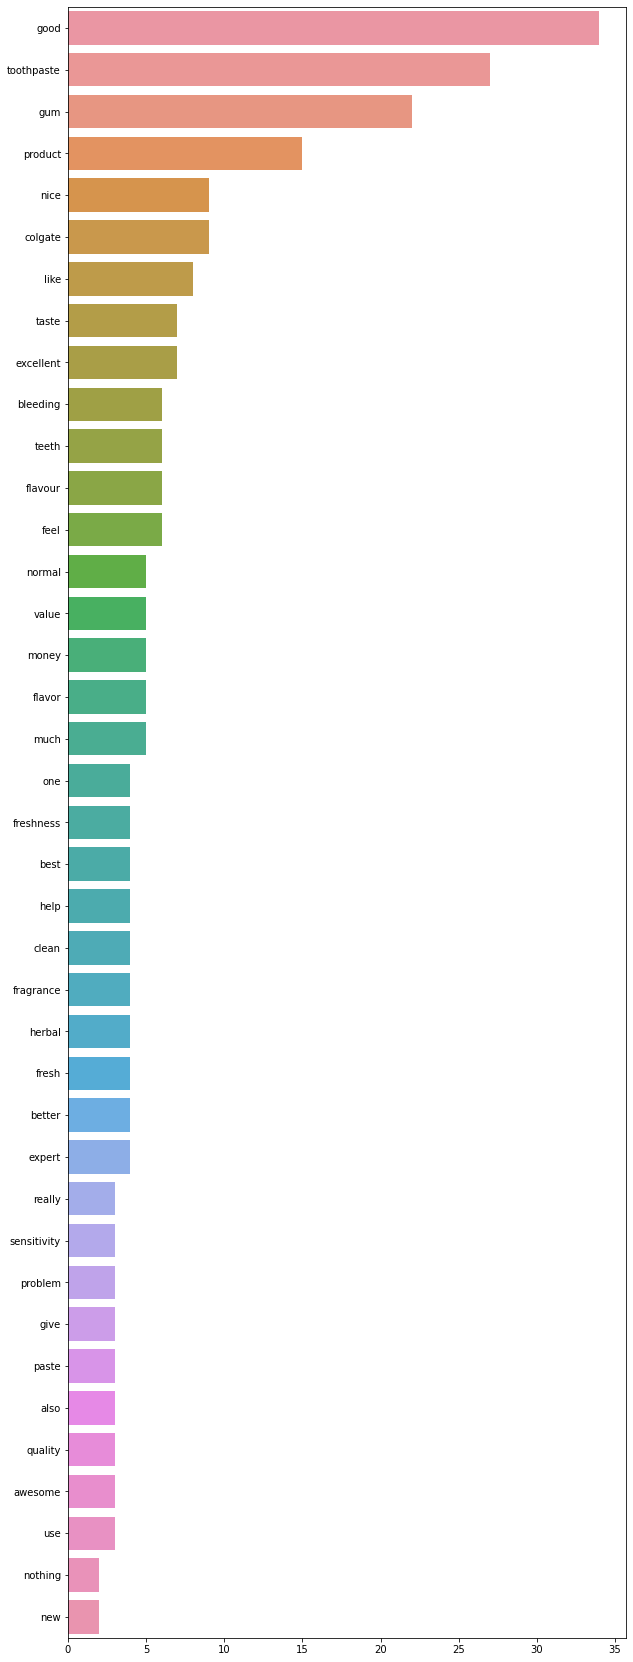

In [16]:
plot_top_non_stopwords_barchart(df['clean_text'])

In [17]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

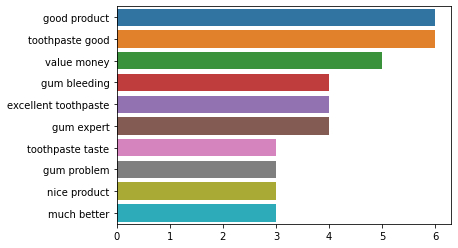

In [18]:
plot_top_ngrams_barchart(df['clean_text'],2)

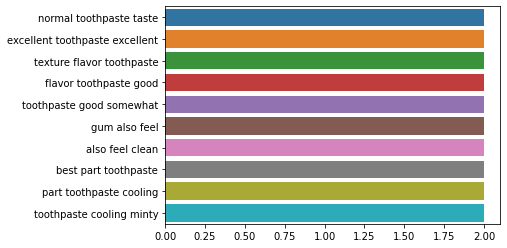

In [19]:
plot_top_ngrams_barchart(df['clean_text'],3)

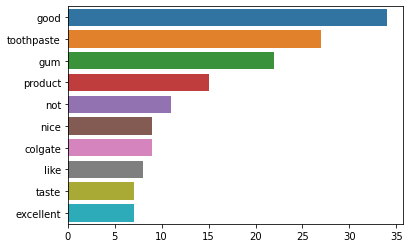

In [20]:
plot_top_ngrams_barchart(df['clean_text'],1)

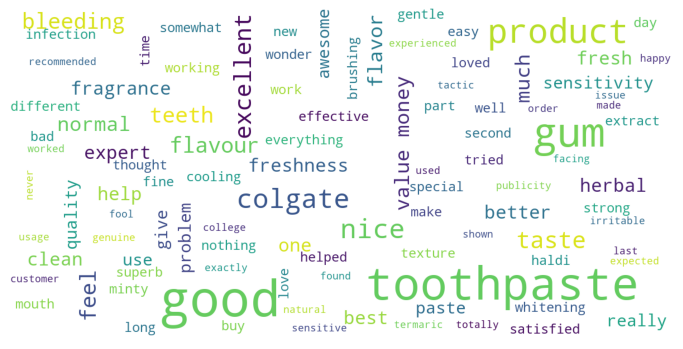

In [21]:
# Without removing Stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
    
    def list_to_string(list_input):
        return ' '.join(str(elem) for elem in list_input)
    
    wordcloud=wordcloud.generate(str(list_to_string(data)))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
    wordcloud.to_file("wordcloud_processed.png")

show_wordcloud(corpus)